In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import util as ut

import matplotlib.pyplot as plt
#plt.style.use('seaborn-ticks')
plt.style.use('seaborn-poster')
%matplotlib inline
#%matplotlib notebook

import numpy as np

from pprint import pprint

import itertools

# import xgboost

Welcome to ROOTaaS 6.06/08


In [2]:
#note that the loading option is True by default
ut.defaultParameters(dataDir='./data', inputName="effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out", inputDir='./classifiers')
ut.setParams()
effFitter = ut.loadOrMake()

entered config files named my_train_config
None
Load object with the name effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out and the following paramters 
{'classifiers': [],
 'clean': [],
 'dataDir': './data',
 'dataFname': 'output_InsideAcceptance_125.root',
 'defineBins': {},
 'forceMake': False,
 'genBranches': ['genPt',
                 'genRapidity',
                 'genJet2p5Pt0',
                 'genJet2p5Rapidity0',
                 'genJet2p5Pt1',
                 'genJet2p5Rapidity1',
                 'genJet2p5Pt2',
                 'genJet2p5Rapidity2',
                 'genJet2p5Pt3',
                 'genJet2p5Rapidity3',
                 'weight',
                 'genNjets2p5'],
 'inputDir': './classifiers',
 'inputName': 'effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out',
 'load': True,
 'ncats': 3,
 'outDir': '.',
 'outName': 'effFitter_out',
 'pfx': 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV',
 'recoBranches': ['recoPt', 'recoRapidity', 'recoNjets2p5'],
 'rn

In [ ]:
defineBins = { 'genJet2p5Rapidity0' : dict(boundaries=[-5.,-2.,-1.,-.5,0.,.5,1.,2.,5.],overflow=False), # do not add overflow automatically
                'genJet2p5Pt0' : dict(boundaries=[0.,50.,80.,100.,140.,170.,200.,220.,250.,1000.],overflow=False)
            }   
defineBins = { 'genJet2p5Rapidity0' : dict(boundaries=[-3.,-2.,.0,2.,3.],overflow=False), # do not add overflow automatically
                'genJet2p5Pt0' : dict(boundaries=[0.,100.,200.,250.,1000.],overflow=False)
            }   

In [ ]:
ut.runDefineBins(effFitter,defineBins)

In [3]:
df = effFitter.df
first_train_evt = int(round(df.index.size*(1.-effFitter.split_frac)))

#take the test sample 
df_test = df[:first_train_evt]

# generate confusion matrix

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap,origin='lower')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    
    #print(cm)
    
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    
    plt.tight_layout()
    plt.ylabel('true category')
    plt.xlabel('predicted category')


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [6]:
Xbr = ["genJet2p5Pt0", "genJet2p5Rapidity0",
                                    "genJet2p5Pt1", "genJet2p5Rapidity1",
                                    "genJet2p5Pt2", "genJet2p5Rapidity2",
                                    "genJet2p5Pt3", "genJet2p5Rapidity3",
                                    "genPt","absGenRapidity",
                   'class_prob_0','class_prob_1','class_prob_2','class_prob_3'
                                ]

In [7]:
X_test = df_test[Xbr].values

In [8]:
clf = effFitter.clfs['recoNjets2p5']

In [ ]:
y_pred = clf.predict(X_test)

In [10]:
Ybr = 'recoNjets2p5Cat'
y_test = df_test[Ybr].values

In [ ]:
class_names = np.arange(y_test.max()+2) -1

Each event in the confusion matrix is weighted
Confusion matrix, without normalization
Normalized confusion matrix


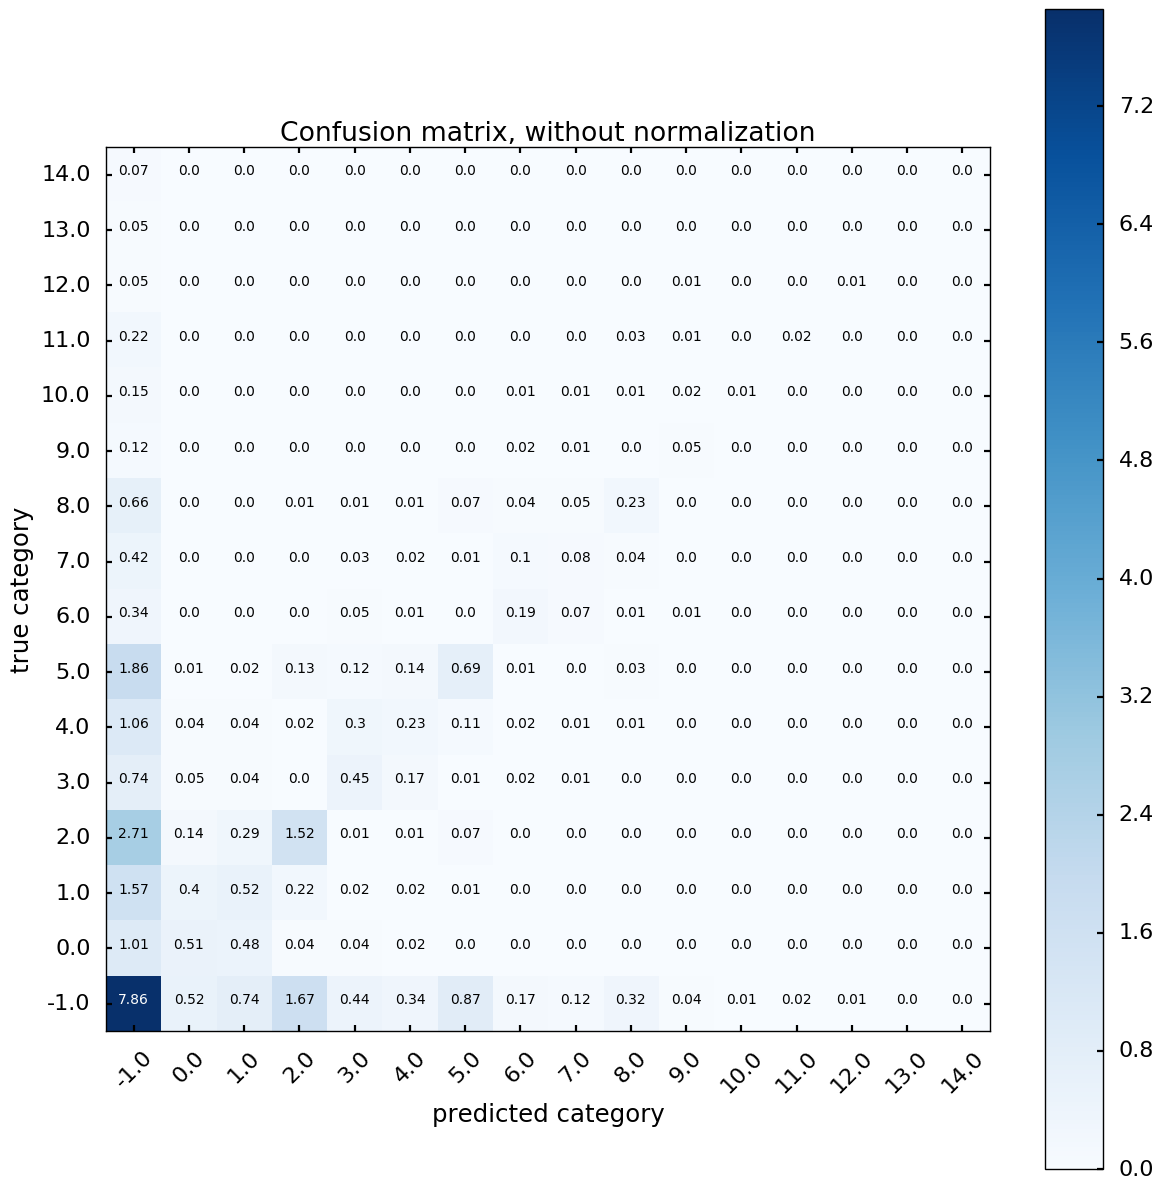

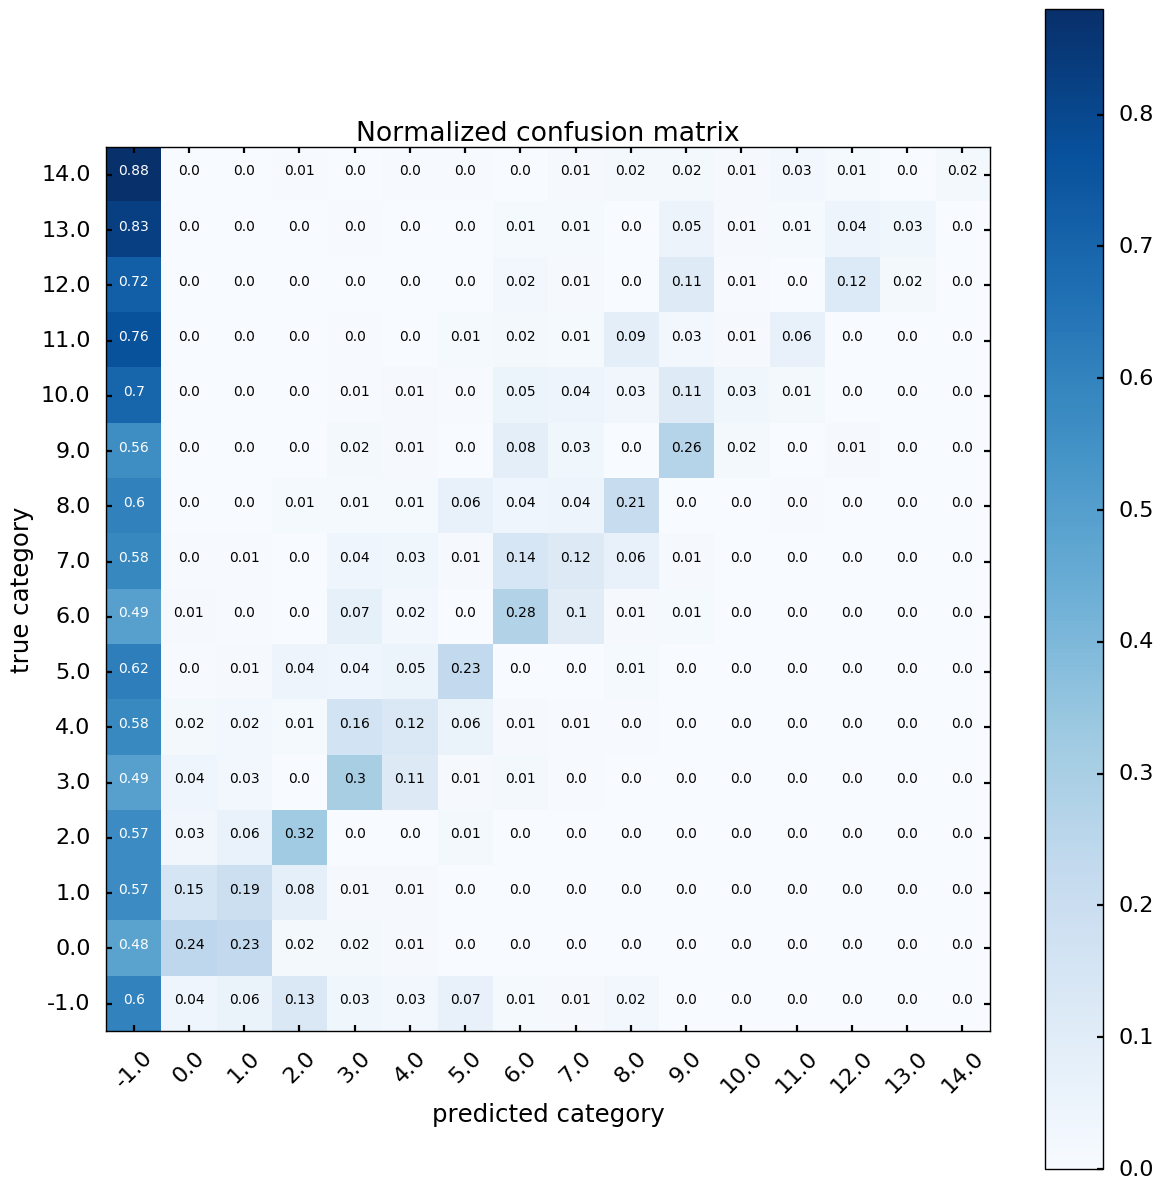

In [12]:
# Compute confusion matrix
print('Each event in the confusion matrix is weighted')
cnf_matrix = confusion_matrix(y_test, y_pred,sample_weight=df_test['absweight'].values)
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()